In [2]:
#importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [3]:
#import dataset

data=pd.read_csv("C:/Users/prabh/Downloads/Asian paint stock market.csv")
data.head()

,Year,Prev Close,Open,High,Low,VWAP,Volume,Turnover,%Deliverble,Close
0,2002,273.95,264.55,272.45,264.05,266.76,2571,6.858306e+10,0.5846,265.60
1,2002,265.60,270.00,273.00,265.00,267.62,2334,6.246326e+10,0.6885,266.75
2,2002,266.75,270.00,275.50,270.00,274.55,6670,1.830000e+11,0.8939,273.30
3,2002,273.30,276.00,276.00,270.00,271.45,2170,5.890379e+10,0.6488,270.70
4,2002,270.70,273.70,280.00,266.05,269.71,4082,1.100000e+11,0.6737,267.75


In [4]:
#data preprocessing
data.isnull().sum()

Year           0
Prev Close     0
Open           0
High           0
Low            0
VWAP           0
Volume         0
Turnover       0
%Deliverble    0
Close          0
dtype: int64

In [5]:
#transform data

x=data.iloc[:,0:3]
y=data.iloc[:,-1]
print(x.shape,y.shape)

(4808, 3) (4808,)


In [6]:
#split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3846, 3) (962, 3) (3846,) (962,)


In [7]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [8]:
pre=lin_model.predict(x_test)
print(pre[:5])

[4901.31681134 1007.00791186  860.144842   1139.05080346  500.93908725]


In [9]:
y_test

2804    4992.60
1480    1009.55
1362     862.45
3868    1125.50
936      501.65
         ...   
3726     899.90
3955    1171.30
4688    2169.45
1149     572.50
1797     728.45
Name: Close, Length: 962, dtype: float64

In [10]:
import pickle

pickle.dump(lin_model,open('asian.pkl','wb'))

In [12]:
year=int(input("enter the year:"))
pre_price=int(input("enter the previous day closing price:"))
open_price=int(input("enter the open_price:"))
r=pickle.load(open('linear.pkl','rb'))
r.predict([[year,pre_price,open_price]])

enter the year: 2050
enter the previous day closing price: 250
enter the open_price: 250


C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([245.33853667])

In [13]:
error=mse(pre,y_test)
error

968.8440936342331

Text(0, 0.5, 'closing price')

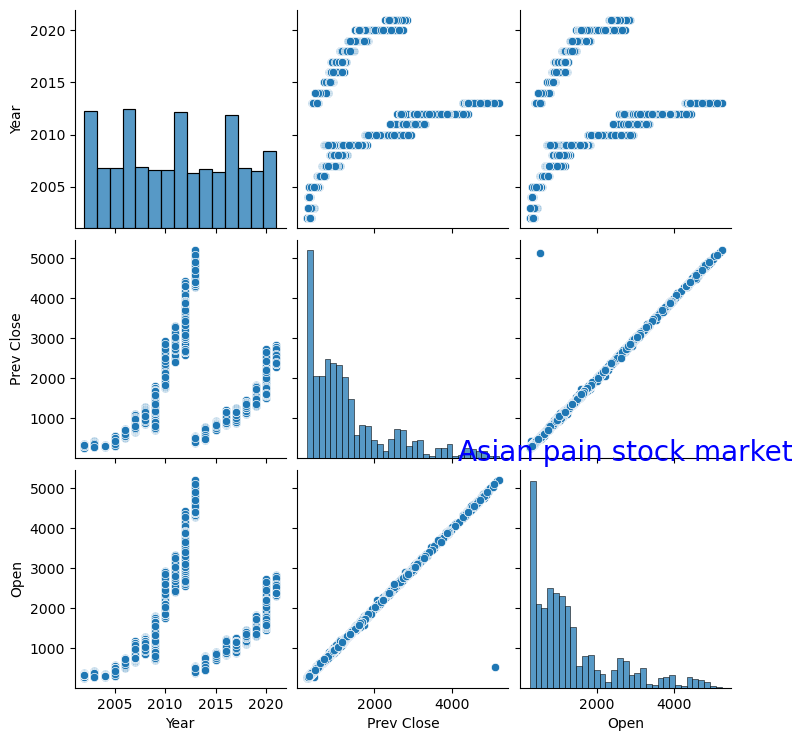

In [14]:
#training plot

sns.pairplot(x_train)
#plt.plot(x_train,r.predict(x_train),color="red")
plt.title("Asian pain stock market",color="blue",size=20)
plt.xlabel("open price",color="blue",size=20)
plt.ylabel("closing price",color="blue",size=20)